# Load Data 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider, Layout
import ipywidgets as widgets
sns.set(style='whitegrid', palette='deep', font_scale=1.1, rc={'figure.figsize': [8, 5]})
plt.rcParams['figure.figsize'] = [12, 8]


# load dataframe
filepath = "../datasets/universal_error/DepolOnly/U3_19.csv"
df = pd.read_csv(filepath)

# reorder columns
df = df[['theta', 'phi', 'lam', 'E', 'depol_prob', 't1', 't2', 'population', 'p0_0', 'p0_1', 'p1_0', 'p1_1']]

# filters
labels = ['theta', 'phi', 'lam', 'E']
depol_columns = ['depol_prob']
thermal_columns = ['t1', 't2', 'population']
readout_columns = ['p0_0', 'p0_1', 'p1_0', 'p1_1']

# filtered dataframes
ideal_only = df.query('depol_prob == 0 & t1 == inf & t2 == inf & p0_0 == 1 & p1_1 == 1')

# Explore Features


### On a non-noisy dataset, what is the relationship between E and $\lambda $ pivoted on $\theta, \phi$?

There's no clear pattern for E as a function of lam.


In [29]:
@interact
def show_gates_more_than(theta_range=widgets.FloatRangeSlider(value=[0, 6.3], min = 0.0, max=2*np.pi, layout=Layout(width='80%')),
                         lam_range=widgets.FloatRangeSlider(value=[0, 6.3], min = 0.0, max=2*np.pi, layout=Layout(width='80%')),
                        phi_values=widgets.SelectMultiple(options=ideal_only['phi'].unique(), value=tuple(ideal_only['phi'].unique()))):
    filtered = ideal_only.loc[(ideal_only['theta'].between(theta_range[0],theta_range[1])) & (ideal_only['lam'].between(lam_range[0],lam_range[1])) & (ideal_only['phi'].isin(phi_values))]
    sns.scatterplot(x='theta', y='E', hue="lam", data=filtered);

interactive(children=(FloatRangeSlider(value=(0.0, 6.283185307179586), description='theta_range', layout=Layou…

In [ ]:
## Depolarization Errors

How does depolarization error affect E as a function of theta

FloatRangeSlider(value=(0.0, 6.283185307179586), description='theta_range', layout=Layout(width='80%'), max=6.…

FloatRangeSlider(value=(0.0, 6.283185307179586), description='lam_range', layout=Layout(width='80%'), max=6.28…

SelectMultiple(description='phi_values', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, …

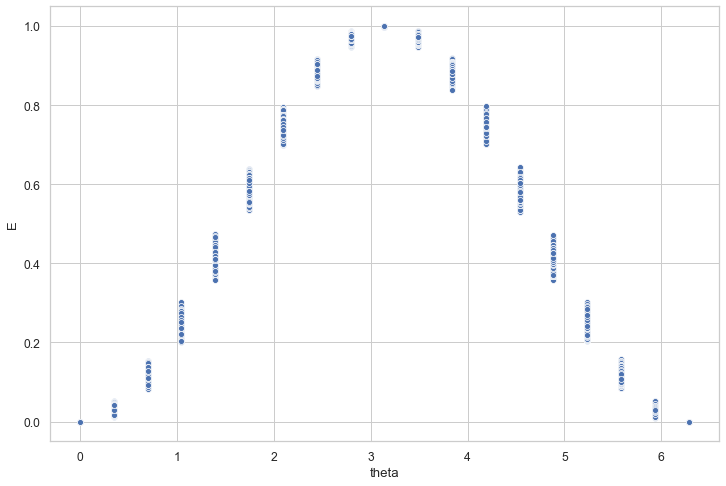

In [46]:
theta_range=widgets.FloatRangeSlider(value=[0, 6.3], min = 0.0, max=2*np.pi, layout=Layout(width='80%'), description='theta_range')
lam_range=widgets.FloatRangeSlider(value=[0, 6.3], min = 0.0, max=2*np.pi, layout=Layout(width='80%'), description='lam_range')
phi_values=widgets.SelectMultiple(options=ideal_only['phi'].unique(), value=tuple(ideal_only['phi'].unique()), description='phi_values')

filtered = df.loc[(df['theta'].between(theta_range.value[0],theta_range.value[1])) & (df['lam'].between(lam_range.value[0],lam_range.value[1])) & (df['phi'].isin(phi_values.value))]
display(theta_range, lam_range, phi_values);
sns.scatterplot(x='theta', y='E', data=filtered);
